close       15740.209167
straddle      281.312233
dtype: float64


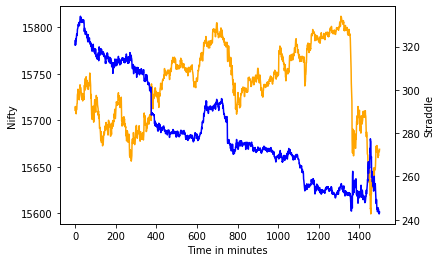

In [4]:
#Plot 0f NIFTY straddle spreads (strike =15700):

import datetime
import pandas as pd
import numpy as np
import time
from kiteconnect import KiteConnect
kite = Zerodha()
kite.set_access_token()
profile = kite.profile()


def historical_data(exchange,symbol,start_date,end_date,frequency):
    sym=exchange+":"+symbol
    token=kite.ltp(sym)[sym]['instrument_token']
    data=kite.historical_data(token,start_date,end_date,frequency)
    df=pd.DataFrame(data)
   
    return df

import matplotlib.pyplot as plt

fut_cmp=pd.DataFrame(historical_data('NFO','NIFTY21JUNFUT',datetime.datetime(2021,6,4),datetime.datetime(2021,6,10),'minute'))
atm_call=historical_data('NFO','NIFTY2161715700CE',datetime.datetime(2021,6,4),datetime.datetime(2021,6,10),'minute')
atm_put=historical_data('NFO','NIFTY2161715700PE',datetime.datetime(2021,6,4),datetime.datetime(2021,6,10),'minute')
straddle=pd.DataFrame(atm_call['close']+atm_put['close'])
fut_cmp=fut_cmp.drop(['open','high','low','volume'],axis=1)
fut_cmp['straddle']=straddle
fut_cmp=fut_cmp.set_index('date')
print(fut_cmp.mean())

x=[i for i in range(0,1500)]
y1=fut_cmp['close']
y2=fut_cmp['straddle']

fig,ax1=plt.subplots()

ax2=ax1.twinx()

ax1.plot(x,y1,'orange')
ax2.plot(x,y2,'blue')
ax1.set_xlabel('Time in minutes')
ax1.set_ylabel('Nifty')
ax2.set_ylabel('Straddle')
plt.show()